# Climate change is real!

## The Data

We have gathered average temperature data for countries across the globe, over the last ~350 years.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
temperatures = pd.read_csv("../data/global_temperatures/GlobalLandTemperaturesByCountry.csv", parse_dates=['dt'])
continents = pd.read_csv("../data/continents.csv")
temperatures = temperatures.merge(continents)

recent = temperatures[temperatures.dt > '2000']

temperatures['month'] = temperatures.dt.dt.month_name() # extract month from date
temperatures['m'] = temperatures.dt.dt.month # extract month from date
temperatures['year'] = temperatures.dt.dt.year # extract year from date
pivot = temperatures.pivot_table(index=["m","month"],columns="year",values="AverageTemperature", aggfunc="mean")

In [9]:
temperatures.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Code,Continent_Year,Continent,month,m,year
211585,1853-10-01,13.857,1.023,Italy,ITA,2015,Europe,October,10,1853
391080,1990-12-01,26.214,0.219,Singapore,SGP,2015,Asia,December,12,1990
345448,1923-06-01,26.843,0.227,Philippines,PHL,2015,Asia,June,6,1923
284425,1946-12-01,16.317,0.248,Mexico,MEX,2015,North America,December,12,1946
469563,1794-12-01,16.692,2.323,Western Sahara,ESH,2015,Africa,December,12,1794


## First Looks

There are major differences between continents on both average values and the amount of fluxtuation throughout the year. A good start to understanding this would be to treat each month and continent separately.

c:\users\duranl4\.virtualenvs\visualization-seminar-qrgs2xap\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


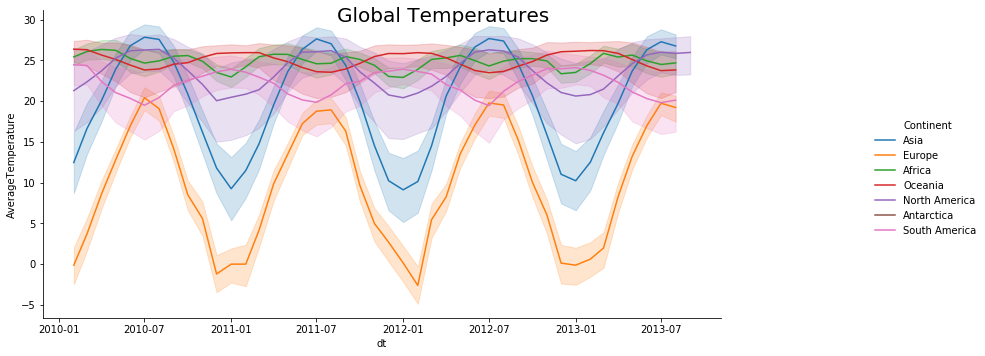

In [19]:
recent = temperatures[temperatures.dt > '2010']
g = sns.relplot(data=recent, x='dt', y='AverageTemperature', hue="Continent", kind="line")
g.fig.suptitle("Global Temperatures", fontsize=20);
g.fig.set_figwidth(15)

## Removing Seasonality

We quickly saw that the data was highly seasonal (of course!), so decided to re-frame the visuals to take away this dominant effect. We can see now that across the board, **temperatures are rising**

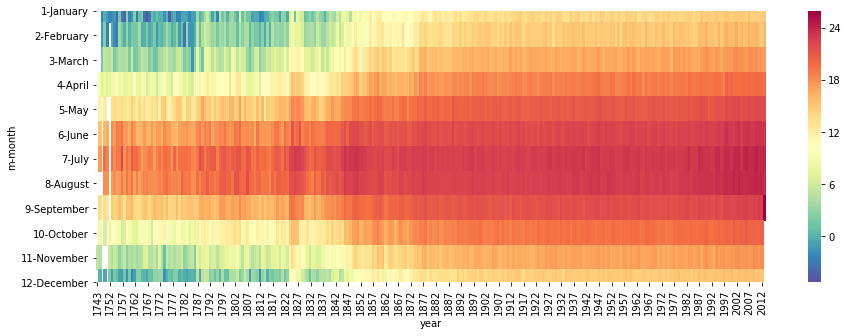

In [7]:
# Solution
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot, ax = ax, cmap="Spectral_r");